#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020


# NetworkX
By Lijiu Liang

## Introduction

In the investigation of web search or recommender systems,if you have connected data then you might need one of the types of graph to model those patterns. The critical point is we need a tool to create and manipulate "Nodes" and "Edges" effeciently.

`NetworkX` is a Python package for studying graphs and networks. It offers the data structures for graphs, digraphs, and multigraphs, as well as some common graph algorithms like depth first search. Another exciting feature is, `Node` can be anything, e.g., text, images, XML records. This package will provide strong help in studying complex graphs and networks.

### Example

The relation database of Users for Facebook can be put in a regular Graph():

In [1]:
import networkx as nx
def both_agree_to_be_friends(a, b): return True

USERS_Facebook = nx.Graph() # create a undirected graph
USERS_Facebook.add_node('you') # user 'you' create an account
USERS_Facebook.add_node('me') # user 'me' create an account
if both_agree_to_be_friends('you','me'): # add friend
    USERS_Facebook.add_edge('you','me') # we use Graph() since order is not important here
# check if the edge exists
print(USERS_Facebook.has_edge('you', 'me'))
print(USERS_Facebook.has_edge('me', 'you'))

True
True


But for twitter, the "follow" has direction. So we need directed graph here:

In [2]:
def a_follow_b(a, b): return True

USERS_Twitter = nx.DiGraph() # create a directed graph
USERS_Twitter.add_node('you') # user 'you' create an account
USERS_Twitter.add_node('me') # user 'me' create an account
if a_follow_b('you', 'me'): # 'you' follows 'me'
    USERS_Twitter.add_edge('you', 'me') # we use DiGraph() since order matters here
# check if the edge exists
print(USERS_Twitter.has_edge('you', 'me'))
print(USERS_Twitter.has_edge('me', 'you'))

True
False


## Install
Install the current release of `NetworkX` with `pip`:

`$ pip install networkx`

With `Anaconda`, `NetworkX` is preinstalled. Update to the current release:

`$ conda install networkx`

Import and test `NetworkX` package in `Jupyter Notebook`:

`>>> import networkx as nx`

`>>> nx.test()`

## Graph Creation

4 kinds of basic graph types are provided as Python classes: `Graph`, `DiGraph`, `MultiGraph`, `MultiDiGraph`.

This is a example of `NetworkX` to create a graph and add nodes, edges.

In [3]:
import math


G = nx.Graph() # create a graph
G.add_node(1) # add nodes
G.add_edge(2, 3) # add edges
G.add_edge(3, 4, weight = 0.5) # edges can have weights
G.add_edge('y', 'x', function = math.cos) # associate data of edge can be anything
G.add_node(math.cos) # nodes can be anything
print(G.adj)

{1: {}, 2: {3: {}}, 3: {2: {}, 4: {'weight': 0.5}}, 4: {3: {'weight': 0.5}}, 'y': {'x': {'function': <built-in function cos>}}, 'x': {'y': {'function': <built-in function cos>}}, <built-in function cos>: {}}


## Graph Reporting

Class views provide basic reporting of nodes, neighbors, edges and degree. 

In [4]:
print(list(G.nodes)) # reports all nodes
print(list(G.edges.data())) # reports all edges
print(G.adj[3])      # reports all neighbours

[1, 2, 3, 4, 'y', 'x', <built-in function cos>]
[(2, 3, {}), (3, 4, {'weight': 0.5}), ('y', 'x', {'function': <built-in function cos>})]
{2: {}, 4: {'weight': 0.5}}


## Drawing

While NetworkX is not designed as a network drawing tool, `draw` function can hadle basic drawing requests.
It also offers a simple interface to drawing package like `Matplotlib`.

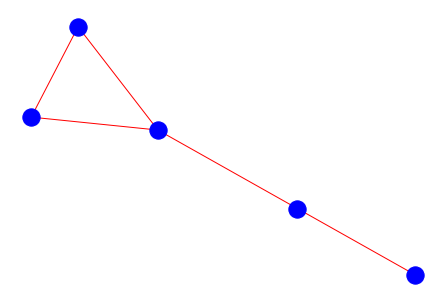

In [5]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,5)])
nx.draw(G, node_color = 'b', edge_color = 'r')

## Example
### Using NetworkX in the investigation of PageRank

In Homework 2, Part 1, before implementing the PageRank algorithm, we need a data structure to store retweets. Apparently a graph is needed. With NetworkX, things can be easy:

In [6]:
import json

# create the graph
G = nx.DiGraph()
user_id, src_id = [], []
with open('HITS.json', 'r', encoding = 'utf-8') as f:
    for line in f:
        data = json.loads(line)
        G.add_edge(data['user']['id'], data['retweeted_status']['user']['id'])

In [7]:
# graph reporting
print("the number of nodes:", G.number_of_nodes())
print("the number of edges:", G.number_of_edges())

the number of nodes: 1003
the number of edges: 6177


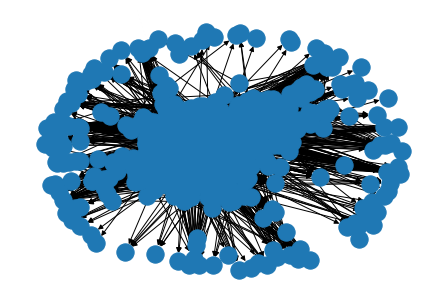

In [8]:
nx.draw(G)

NetworkX provides a build-in function to compute the PageRank score. The result is similar to the self-implement function in Homework 2, Part 1.2. The top-10 users with highest PR score is listed below:

In [9]:
pr_scores = nx.pagerank(G, alpha = 0.9, max_iter = 100, tol = 1e-06)

res = sorted(pr_scores.items(), key = lambda x: x[1], reverse = True)
for i, pair in enumerate(res):
    print('Rank', i + 1,'id:', pair[0], 'score:', pair[1])
    if i == 9: break

Rank 1 id: 1183906148 score: 0.028252836962809853
Rank 2 id: 3019659587 score: 0.021634833058248377
Rank 3 id: 3077695572 score: 0.0210076830775328
Rank 4 id: 3068694151 score: 0.018565181216950773
Rank 5 id: 2598548166 score: 0.01757115420183777
Rank 6 id: 3154266823 score: 0.017354713283615566
Rank 7 id: 571198546 score: 0.01733869316058539
Rank 8 id: 3042570996 score: 0.017248555545735813
Rank 9 id: 3039321886 score: 0.015660329371210167
Rank 10 id: 3082766914 score: 0.01457440303933137


## Reference
[1] [Documentation of NetworkX](https://networkx.github.io/documentation/stable/index.html)

[2] [Getting started with NetworkX](https://riptutorial.com/networkx/example/18973/installation-or-setup)

[3] [networkx.algorithms.link_analysis.pagerank_alg.pagerank](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html?highlight=pagerank#networkx.algorithms.link_analysis.pagerank_alg.pagerank)